https://stackoverflow.com/questions/77295500/remove-noise-in-data-keep-the-original-trend

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal, optimize

In [2]:
np.random.seed(12345)

In [3]:
def model(x, a, b, c):
    return a*np.exp(-b*x) + c

In [4]:
x = np.linspace(0, 350, 200)
y = model(x, 100, 0.01, 75)
n = np.random.normal(size=x.size)
yn = y + n

In [5]:
yn[20] *= 0.75
yn[21] *= 0.5
yn[22] *= 1.75
yn[23] *= 0.25
yn[24] *= 0.20
yn[25] *= 0.75
yn[100] *= 0.5
yn[101] *= 1.75

In [6]:
ys = signal.savgol_filter(yn, 150, 3)

In [7]:
popt1, pcov1 = optimize.curve_fit(model, x, yn)

/tmp/ipykernel_438/2667668635.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x) + c


In [8]:
popt1, pcov1

(array([9.27557251e+01, 1.02647524e-02, 7.64660389e+01]),
 array([[ 1.94284082e+01,  7.21272130e-04, -3.70396525e+00],
        [ 7.21272130e-04,  1.80489353e-06,  3.75303063e-03],
        [-3.70396525e+00,  3.75303063e-03,  1.05002199e+01]]))

In [9]:
def residuals(args, x, y):
    return model(x, *args) - y 

In [10]:
result = optimize.least_squares(residuals, x0=(10, 0.1, 10), args=(x, yn), loss="cauchy")

/tmp/ipykernel_438/2667668635.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x) + c
/tmp/ipykernel_438/2667668635.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x) + c


In [20]:
popt1b = result.x
popt1b

array([1.00306426e+02, 1.00068743e-02, 7.49353910e+01])

In [12]:
yhat1 = model(x, *popt1)
yhat1b = model(x, *popt1b)

In [13]:
zs1 = stats.zscore(yhat1 - yn)
mask = np.abs(zs1) < 2

In [14]:
zs1b = stats.zscore(yhat1b - yn)

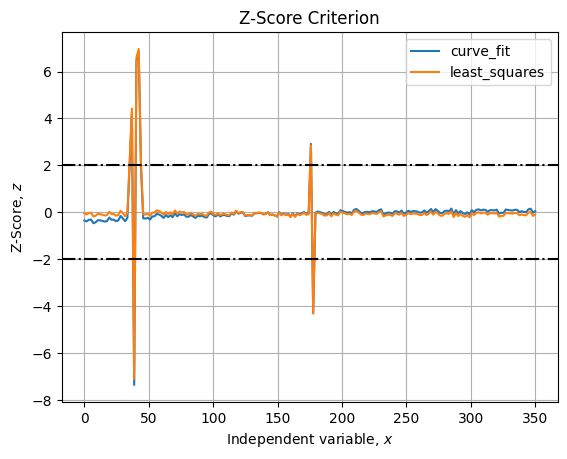

In [29]:
fig, axe = plt.subplots()
axe.plot(x, zs1, label="curve_fit")
axe.plot(x, zs1b, label="least_squares")
axe.axhline(2, linestyle="-.", color="black")
axe.axhline(-2, linestyle="-.", color="black")
axe.set_title("Z-Score Criterion")
axe.set_xlabel("Independent variable, $x$")
axe.set_ylabel("Z-Score, $z$")
axe.legend()
axe.grid()

In [16]:
popt2, pcov2 = optimize.curve_fit(model, x[mask], yn[mask])

/tmp/ipykernel_438/2667668635.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x) + c


In [17]:
popt2, pcov2

(array([9.90714297e+01, 1.01604158e-02, 7.54550734e+01]),
 array([[ 5.81279449e-01,  1.70129801e-05, -1.13880755e-01],
        [ 1.70129801e-05,  4.43252922e-08,  1.00312909e-04],
        [-1.13880755e-01,  1.00312909e-04,  3.04817515e-01]]))

In [18]:
yhat2 = model(x, *popt2)

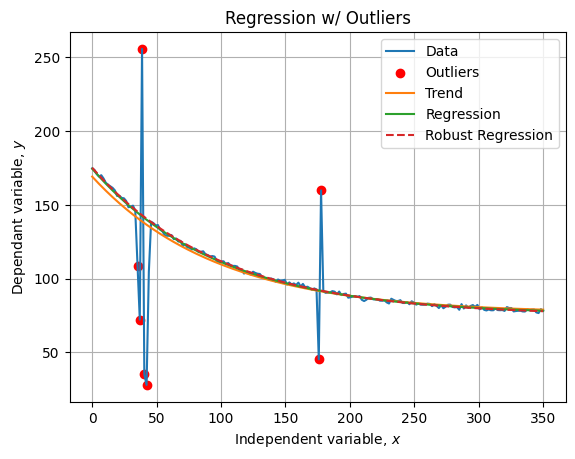

In [30]:
fig, axe = plt.subplots()
axe.plot(x, yn, "-", label="Data")
axe.scatter(x[~mask], yn[~mask], color="red", label="Outliers")
axe.plot(x, yhat1, label="Trend")
axe.plot(x, yhat2, label="Regression")
axe.plot(x, yhat1b, "--", label="Robust Regression")
axe.set_title("Regression w/ Outliers")
axe.set_xlabel("Independent variable, $x$")
axe.set_ylabel("Dependant variable, $y$")
axe.legend()
axe.grid()